In [ ]:
%cd /content/drive/MyDrive/mask-rcnn-matterport
!pip install -r requirements.txt
!python setup.py install
!pip install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.2.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0
!pip install h5py==2.10.0
!pip install -U scikit-image==0.16.2

In [ ]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/mask-rcnn-matterport")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.visualize import display_images
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/custom/"))  # To find local version
import custom

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, 'samples/custom/dataset/train')

In [ ]:
dataset_train = custom.CustomDataset()

In [ ]:
class InferenceConfig(custom.CustomConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                21
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

CUSTOM_MODEL_PATH = os.path.join(ROOT_DIR, "logs/custom20211207T1931/mask_rcnn_custom_0030.h5")

# Load weights trained on MS-COCO
model.load_weights(CUSTOM_MODEL_PATH, by_name=True)

Re-starting from epoch 30


In [ ]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')

# #Update the class names in the order mentioned in the custom.py file
class_names = ['BG', 'lane_blue', 'lane_shoulder', 'lane_white', 'lane_yellow', 'vehicle_bike', 'vehicle_bus', 'vehicle_car', 'vehicle_truck']

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 21)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


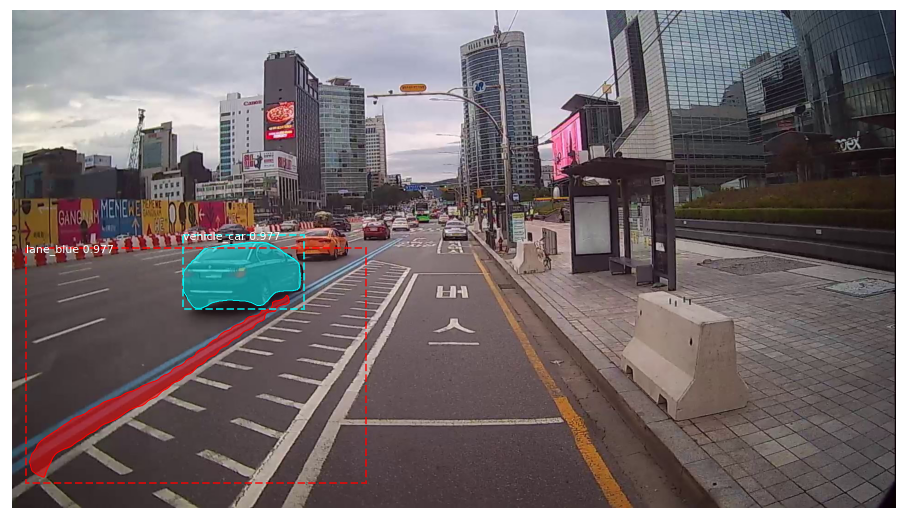

In [ ]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# file_names = '/content/drive/MyDrive/mask-rcnn-matterport/customimages/AccurateFragrantArabianoryx-size_restricted.gif'
# image = skimage.io.imread(file_names)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


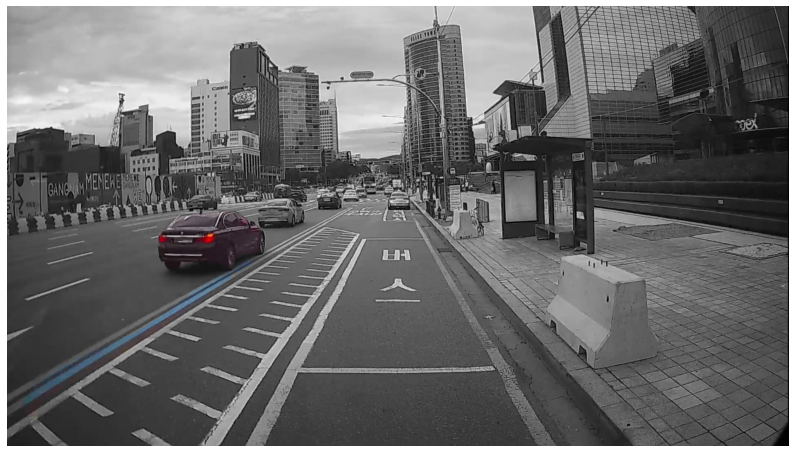

In [ ]:
splash = custom.color_splash(image, r['masks'])
display_images([splash], cols=1)

[[ 457  186 1080  876]
 [ 440  390  662  776]
 [ 446  978 1080 1536]]
[array([ 457,  186, 1080,  876], dtype=int32), array([440, 390, 662, 776], dtype=int32), array([ 446,  978, 1080, 1536], dtype=int32)]


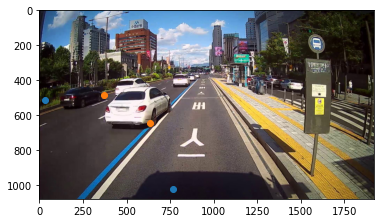

In [ ]:
import matplotlib.pyplot as plt

print(r['rois'])
p1 = []
p2 = []
if len(r['rois'] > 1):
  for p in r['rois']:
    p1.append(p)

for p in p1:
  

print(p1)
plt.xlim([0, 1920])
plt.ylim([1080, 0])
plt.scatter((31, 769), (515, 1025))
plt.scatter((373, 635), (486, 648))
plt.imshow(image)
plt.show()

In [ ]:
import json

JSON_DIR = os.path.join(IMAGE_DIR, 'via_region_data.json')
file_names2 = []
with open(JSON_DIR, 'r') as file:
  anno = json.load(file)
  for a in anno.values():
    regions = a['regions'].values()
    typearr = []
    for o in regions:
      violation_type = o['region_attributes']['metainfo']['violation_type']
      typearr.append(violation_type)
      typearr = set(typearr)
      typearr = list(typearr)
    if(len(typearr) == 1):
      file_names2.append([a['filename'],violation_type])
    else: print(a['filename'])
  print(len(anno))
  print(len(file_names2))

[BLUE]09284A_151556_001.jpg
[BLUE]70201A_134129_005.jpg
1886
1884


In [ ]:
print(file_names2[2])

['[BLUE]05803A_154240_005.jpg', 'BLUE']


Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 21)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


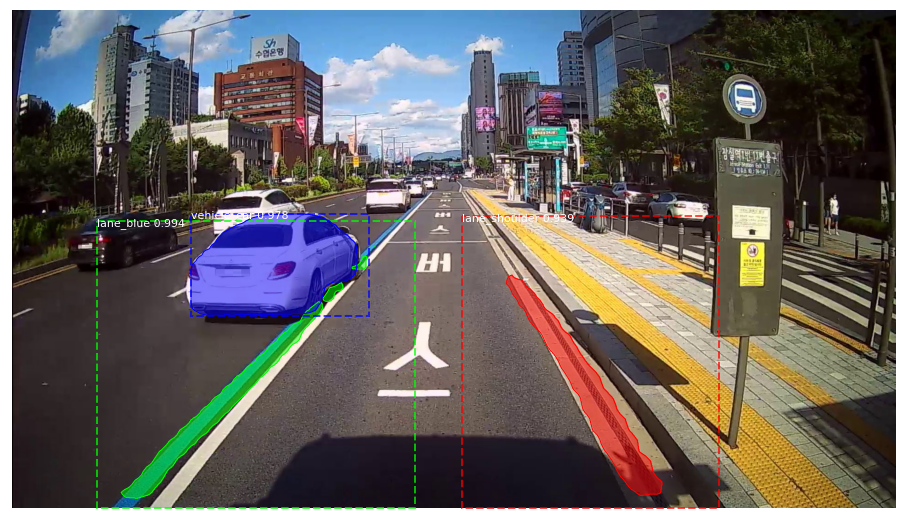

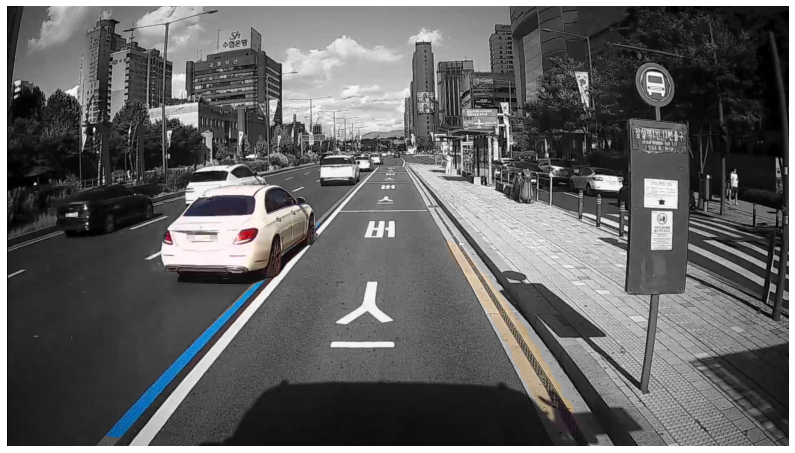

BLUE


In [ ]:
selec_image = file_names2[0]
image = skimage.io.imread(os.path.join(IMAGE_DIR, selec_image[0]))

# file_names = '/content/drive/MyDrive/mask-rcnn-matterport/customimages/AccurateFragrantArabianoryx-size_restricted.gif'
# image = skimage.io.imread(file_names)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

splash = custom.color_splash(image, r['masks'])
display_images([splash], cols=1)
print(selec_image[1])